In [28]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connecting to my PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="credit_card_transactions",
    user="postgres",
    password="1087"
)

# Loading the data into a DataFrame
query = "SELECT * FROM credit_card_transactions"
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()


C:\Users\sidne\AppData\Local\Temp\ipykernel_15904\804058575.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [29]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,transaction_hour
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0,19
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0,19
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0,19
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0,19
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,121130.00,0.12,1.05,-1.10,0.04,0.16,-1.40,0.75,0.09,-0.18,...,0.93,0.02,-0.04,-0.25,-0.15,-0.08,-0.04,56.00,0,4
284803,122027.00,-0.58,-0.35,0.55,-1.98,0.68,-0.93,-0.30,0.07,-1.04,...,1.09,-0.14,-0.42,-0.42,-0.27,0.18,0.22,14.97,0,4
284804,123065.00,2.00,-0.14,-1.16,0.48,-0.10,-1.18,0.30,-0.38,0.50,...,-0.51,0.25,0.08,-0.19,0.27,-0.08,-0.06,36.65,0,5
284805,161908.00,2.06,0.12,-1.70,0.43,0.37,-0.90,0.18,-0.23,0.53,...,-0.96,0.34,0.56,-0.27,0.17,-0.07,-0.03,8.94,0,15


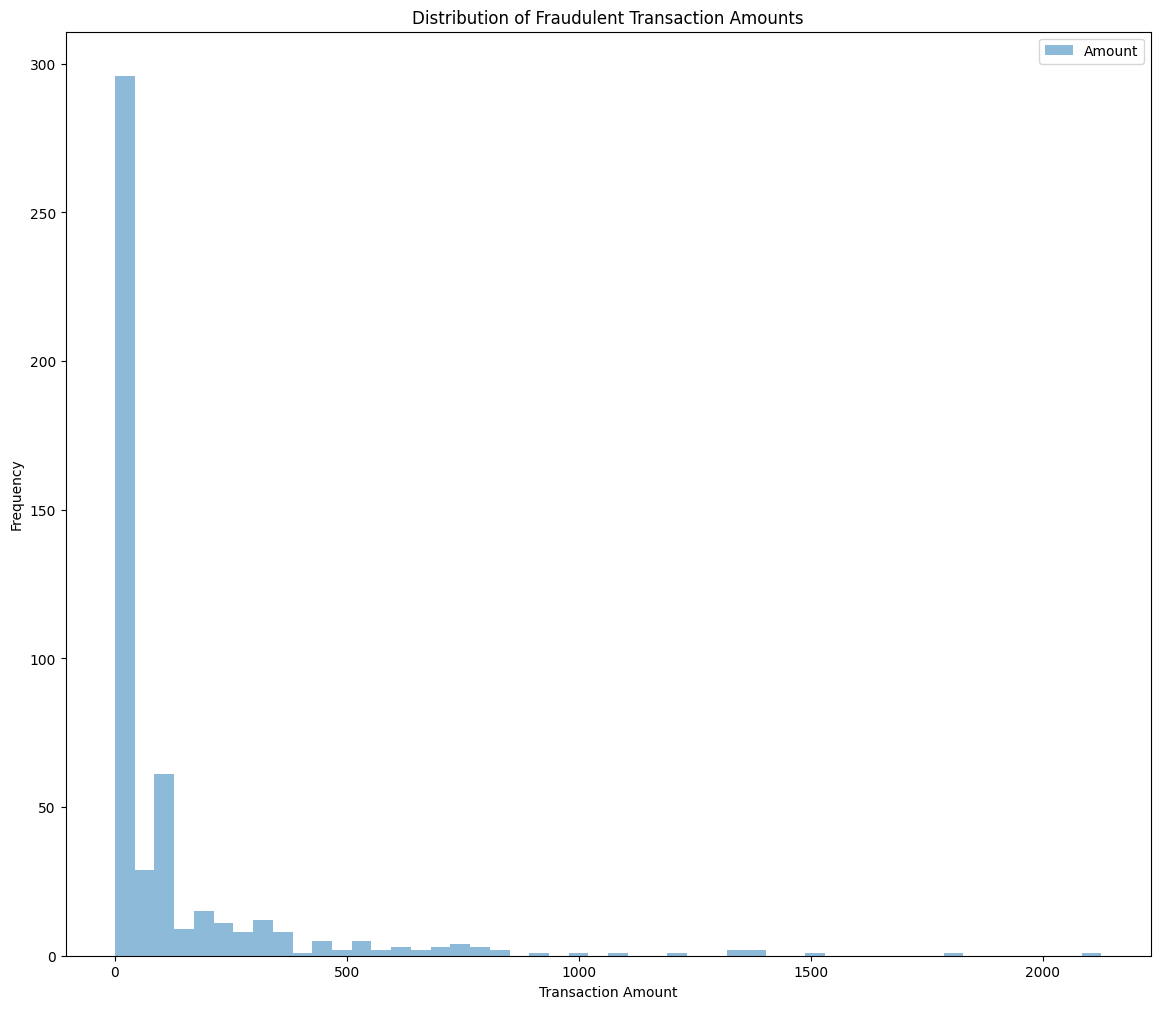

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
# df[df['Class'] == 0]['Amount'].plot(kind='hist', bins=50, alpha=0.5, label='Genuine')
df[df['Class'] == 1]['Amount'].plot(kind='hist', bins=50, alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.legend()
plt.show()

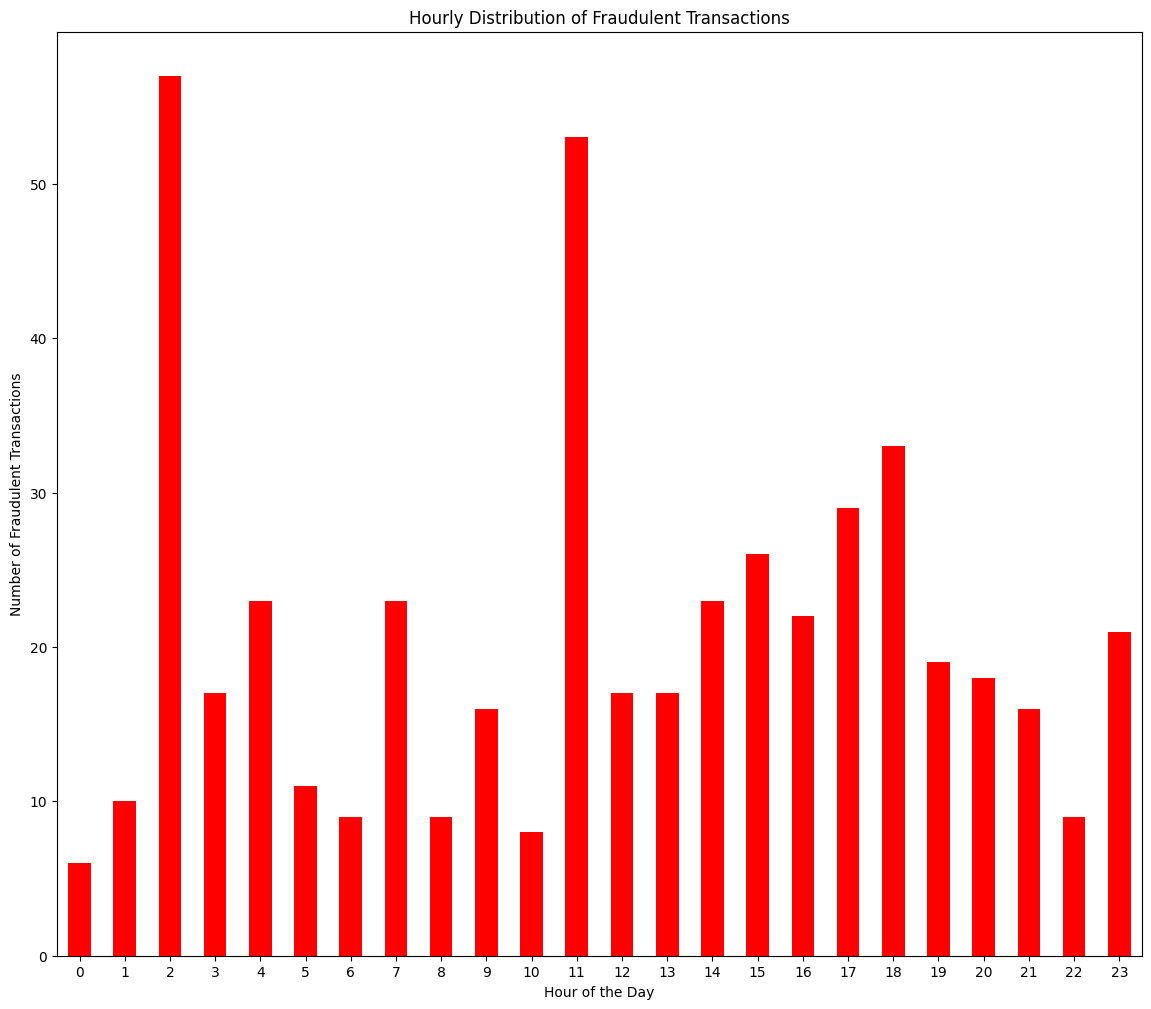

In [58]:
df['TransactionTime'] = pd.to_datetime(df['Time'], unit='s')
df['Hour'] = df['TransactionTime'].dt.hour

fraud_hourly_counts = df[df['Class'] == 1]['Hour'].value_counts().sort_index()

plt.figure(figsize=(14, 12))
fraud_hourly_counts.plot(kind='bar', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.show()


C:\Users\sidne\AppData\Local\Temp\ipykernel_15904\868694329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


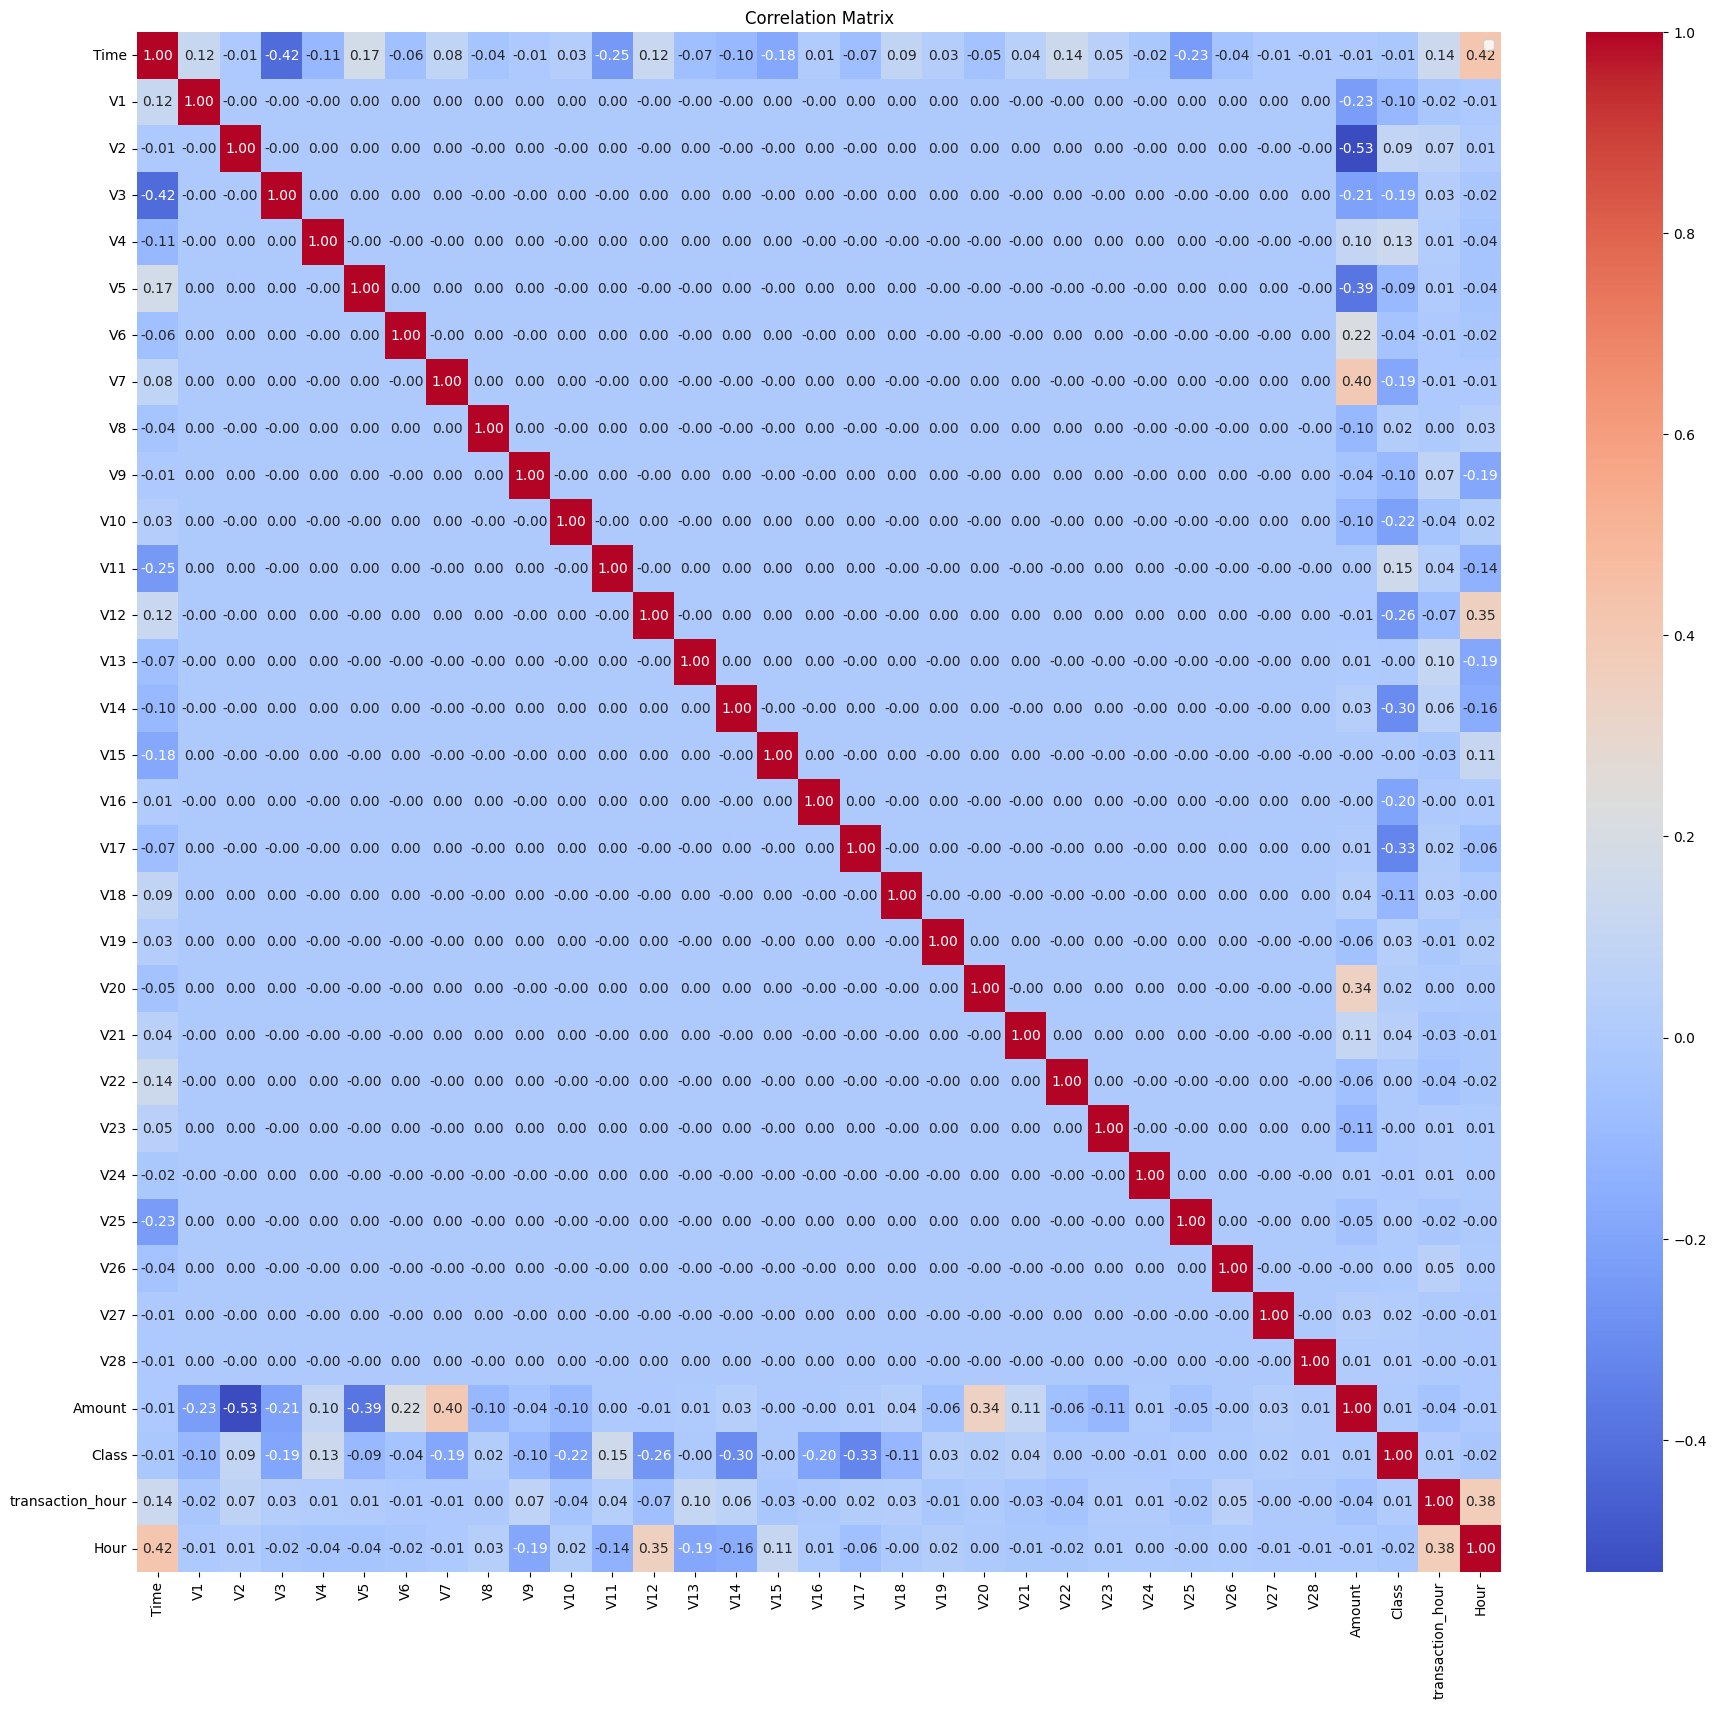

In [52]:
plt.figure(figsize=(22, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.legend()
plt.title('Correlation Matrix')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

df_new = df.drop(columns={"TransactionTime"})

# Separate the features and target variable
X = df_new.drop('Class', axis=1)
y = df_new['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression(max_iter=300000)



In [35]:
columns_to_convert = {
    'V1': float,
    'V2': float,
    'V3': float,
    'V4': float,
    'V5': float,
    'V6': float,
    'V7': float,
    'V8': float,
    'V9': float,
    'V10': float,
    'V11': float,
    'V12': float,
    'V13': float,
    'V13': float,
    'V14': float,
    'V15': float,
    'V16': float,
    'V18': float,
    'V19': float,
    'V20': float,
    'V21': float,
    'V22': float,
    'V23': float,
    'V24': float,
    'V25': float,
    'V26': float,
    'V27': float,
    'V28': float,
}

df = df.astype(columns_to_convert)

# pd.options.display.float_format = '{:.2f}'.format

df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,transaction_hour,TransactionTime,Hour
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,0.07,0.13,-0.19,0.13,-0.02,149.62,0,19,1970-01-01 00:00:00,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.34,0.17,0.13,-0.01,0.01,2.69,0,19,1970-01-01 00:00:00,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0,19,1970-01-01 00:00:01,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-1.18,0.65,-0.22,0.06,0.06,123.50,0,19,1970-01-01 00:00:01,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,0.14,-0.21,0.50,0.22,0.22,69.99,0,19,1970-01-01 00:00:02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,121130.00,0.12,1.05,-1.10,0.04,0.16,-1.40,0.75,0.09,-0.18,...,-0.04,-0.25,-0.15,-0.08,-0.04,56.00,0,4,1970-01-02 09:38:50,9
284803,122027.00,-0.58,-0.35,0.55,-1.98,0.68,-0.93,-0.30,0.07,-1.04,...,-0.42,-0.42,-0.27,0.18,0.22,14.97,0,4,1970-01-02 09:53:47,9
284804,123065.00,2.00,-0.14,-1.16,0.48,-0.10,-1.18,0.30,-0.38,0.50,...,0.08,-0.19,0.27,-0.08,-0.06,36.65,0,5,1970-01-02 10:11:05,10
284805,161908.00,2.06,0.12,-1.70,0.43,0.37,-0.90,0.18,-0.23,0.53,...,0.56,-0.27,0.17,-0.07,-0.03,8.94,0,15,1970-01-02 20:58:28,20


In [41]:
X_train.dtypes

Time                float64
V1                  float64
V2                  float64
V3                  float64
V4                  float64
V5                  float64
V6                  float64
V7                  float64
V8                  float64
V9                  float64
V10                 float64
V11                 float64
V12                 float64
V13                 float64
V14                 float64
V15                 float64
V16                 float64
V17                 float64
V18                 float64
V19                 float64
V20                 float64
V21                 float64
V22                 float64
V23                 float64
V24                 float64
V25                 float64
V26                 float64
V27                 float64
V28                 float64
Amount              float64
transaction_hour      int64
Hour                  int64
dtype: object

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9991222218320986
Precision: 0.8472222222222222
Recall: 0.61
F1 Score: 0.7093023255813953


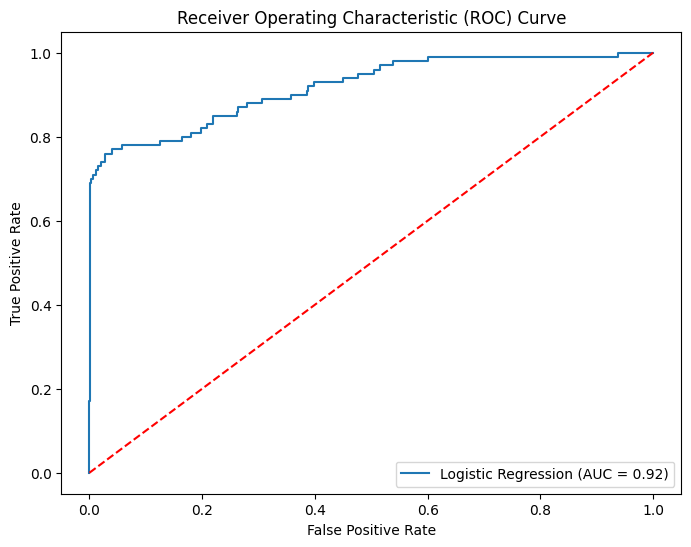

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for each class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


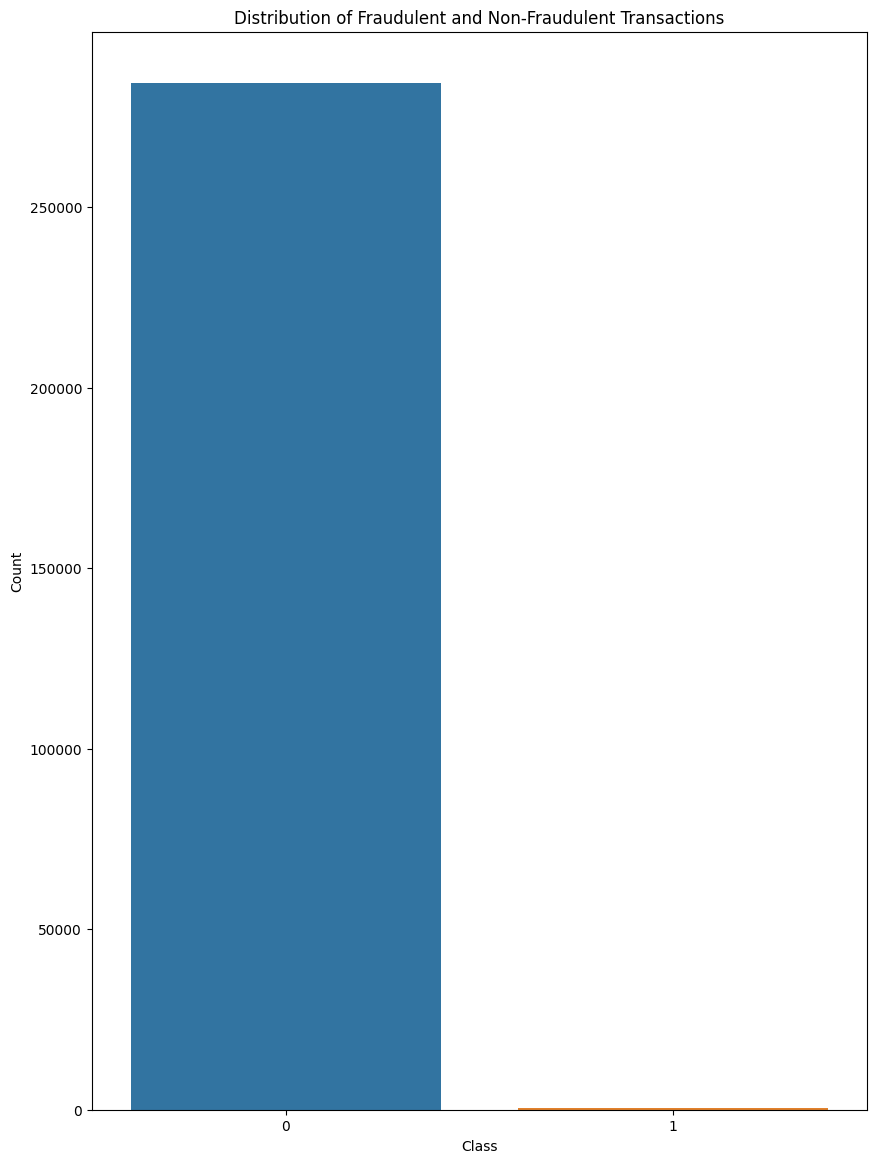

In [51]:



# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 14))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()
